<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [13]</a>'.</span>

In [1]:
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin


In [2]:
from pathlib import Path
import os
import pprint

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import IPython.display as ipd

from wavenet import model, train, sample, audio, datasets, utils, viz, debug

In [3]:
pp = pprint.PrettyPrinter(indent=2)

# Train on Maestro

In [4]:
# this cell contains papermill tagged parameters
# they can be overriden by the cli when training:  
# papermill in.ipynb out.ipynb -p batch_norm True

batch_norm = False
learning_rate = 0.0044
batch_size = 12
max_epochs = 2

In [5]:
# Parameters
batch_size = 15
batch_norm = True


In [6]:
# automatically scale up the learning rate when using batch norm
if batch_norm:
    learning_rate *= 5

In [7]:
p = model.HParams(
    embed_inputs=True, 
    n_audio_chans=1, 
    squash_to_mono=True,
    batch_norm=batch_norm
)

pp.pprint(dict(p))

{ 'batch_norm': True,
  'compress': True,
  'dilation_stacks': 3,
  'embed_inputs': True,
  'kernel_size': 2,
  'mixed_precision': True,
  'n_audio_chans': 1,
  'n_chans': 128,
  'n_chans_embed': 256,
  'n_chans_end': 256,
  'n_chans_res': 96,
  'n_chans_skip': 256,
  'n_classes': 256,
  'n_layers': 11,
  'resample': True,
  'resampling_method': 'soxr_hq',
  'sample_from_gpu': True,
  'sample_length': 16000,
  'sampling_rate': 16000,
  'seed': 5763,
  'squash_to_mono': True,
  'use_deterministic_algorithms': False}


In [8]:
tp = train.HParams(
    max_epochs=max_epochs, 
    batch_size=batch_size, 
    num_workers=8, 
    learning_rate=learning_rate
)

print(dict(tp))

{'project_name': 'feldberlin-wavenet', 'max_epochs': 2, 'batch_size': 15, 'learning_rate': 0.022000000000000002, 'onecycle': True, 'betas': (0.9, 0.95), 'grad_norm_clip': None, 'callback_fq': 8, 'num_workers': 8, 'finder': False}


In [9]:
utils.seed(p)
nas_path = Path('/srv/datasets/maestro/maestro-v2.0.0')
ssd_path = Path('/srv/datasets-ssd/maestro/maestro-v2.0.0')
ds_train, ds_test = datasets.maestro(nas_path, 2017, p, ssd_path)

In [10]:
utils.seed(p)
m = model.Wavenet(p)
debug.summarize(m)

+-------------------------------+------------+
|            Modules            | Parameters |
+-------------------------------+------------+
|          embed.weight         |   65536    |
|         shifted.weight        |   65536    |
|      shifted.norm.weight      |    128     |
|       shifted.norm.bias       |    128     |
|      layers.0.conv.weight     |   49152    |
|   layers.0.conv.norm.weight   |    192     |
|    layers.0.conv.norm.bias    |    192     |
|     layers.0.res1x1.weight    |   12288    |
|  layers.0.res1x1.norm.weight  |    128     |
|   layers.0.res1x1.norm.bias   |    128     |
|    layers.0.skip1x1.weight    |   24576    |
|  layers.0.skip1x1.norm.weight |    256     |
|   layers.0.skip1x1.norm.bias  |    256     |
|      layers.1.conv.weight     |   49152    |
|   layers.1.conv.norm.weight   |    192     |
|    layers.1.conv.norm.bias    |    192     |
|     layers.1.res1x1.weight    |   12288    |
|  layers.1.res1x1.norm.weight  |    128     |
|   layers.1.

In [11]:
t = train.Trainer(m, ds_train, ds_test, tp, None)
t.metrics

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: purzelrakete (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


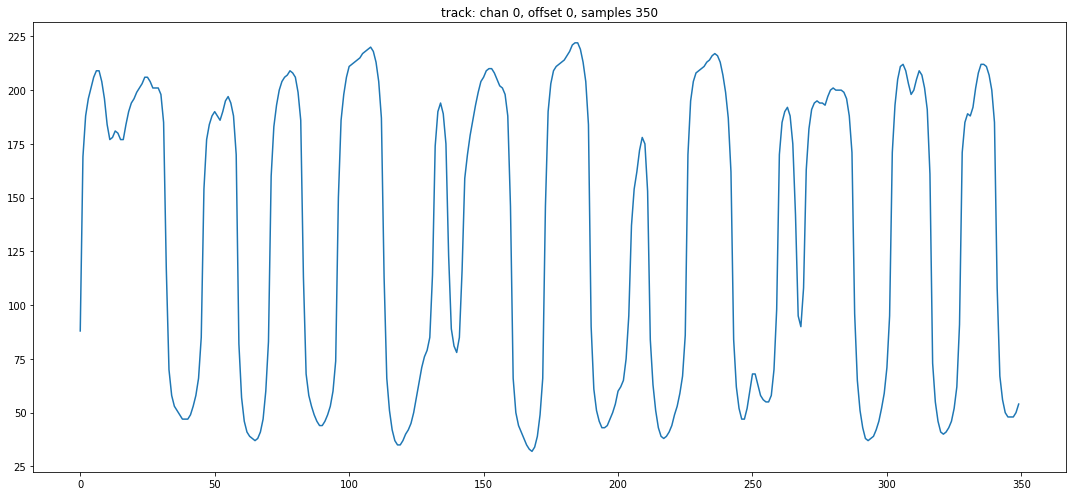

In [12]:
track_i = viz.plot_random_track(ds_train)
track, *_ = ds_train[track_i]
ipd.Audio(audio.mu_expand(track.squeeze().numpy(), p), rate=p.sampling_rate)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [13]:
utils.seed(p)
t.train()

  0%|          | 0/2990 [00:00<?, ?it/s]/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
1:0 loss 6.04245 lr 8.800162e-04:   0%|          | 1/2990 [00:03<2:58:13,  3.58s/it]


RuntimeError: Caught RuntimeError in replica 0 on device 0.
Original Traceback (most recent call last):
  File "/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/parallel/parallel_apply.py", line 61, in _worker
    output = module(*input, **kwargs)
  File "/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/modules/module.py", line 1071, in _call_impl
    result = forward_call(*input, **kwargs)
  File "/home/purzelrakete/src/github.com/feldberlin/wavenet/wavenet/model.py", line 112, in forward
    loss = F.cross_entropy(x, y)
  File "/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/functional.py", line 2824, in cross_entropy
    return torch._C._nn.cross_entropy_loss(input, target, weight, _Reduction.get_enum(reduction), ignore_index)
RuntimeError: CUDA out of memory. Tried to allocate 64.00 MiB (GPU 0; 10.76 GiB total capacity; 8.54 GiB already allocated; 41.44 MiB free; 9.58 GiB reserved in total by PyTorch)


In [ ]:
utils.seed(p)
tracks, logits, g = sample.fast(m, ds_train.transforms, utils.decode_nucleus(), n_samples=32000, batch_size=10)

In [ ]:
for track in tracks:
    track = ds_train.transforms.normalise(track.numpy())
    track = audio.mu_expand(track, p)
    ipd.display(ipd.Audio(track, rate=p.sampling_rate))

In [ ]:
t.metrics.finish()